<a href="https://colab.research.google.com/github/gopikasingh/CNN-Model/blob/main/CREATING_DATASET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install opencv-python
import cv2
from tqdm import tqdm

shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
shell-init: error retrieving current directory: getcwd: cannot access parent directories: No such file or directory
The folder you are executing pip from can no longer be found.


In [29]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [30]:
import os
import sys
os.chdir('/content/gdrive/My Drive/AI ML ')
!pwd
Root_DIR = os.path.abspath("")
print(Root_DIR)
sys.path.append(Root_DIR)

/content/gdrive/.shortcut-targets-by-id/1SubdptR2K_xSjz4kDT6vPp2JHEdOeOTD/AI ML 
/content/gdrive/.shortcut-targets-by-id/1SubdptR2K_xSjz4kDT6vPp2JHEdOeOTD/AI ML 


In [31]:
DATADIR = '/content/gdrive/My Drive/AI ML '

CATEGORIES = ["ANGRY", "HEARTEYES", "LAUGH", "NEUTRAL", "SAD", "SMILING", "TEASING", "WINK"]

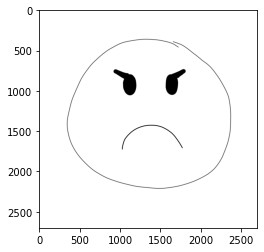

In [32]:
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):  # iterating over each image folder
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')
        plt.show()

        break
    break

In [33]:
print(img_array)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [34]:
print(img_array.shape)

(2700, 2700)


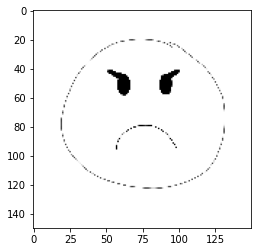

In [35]:
IMG_SIZE = 150

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [36]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)  # get the classification (0 to 7)

        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resizing to normalize data size
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()

print(len(training_data))

100%|██████████| 292/292 [00:16<00:00, 17.39it/s]

2003


In [37]:
import random

random.shuffle(training_data)

In [38]:
for sample in training_data[:20]:
    print(sample[1])

1
6
3
7
4
4
2
0
5
0
5
0
4
7
2
0
4
3
7
2


In [39]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)   #CHANGE THE CHANNEL '1' TO '3' FOR RGB IMAGES

[[[[168]
   [167]
   [167]
   ...
   [167]
   [168]
   [167]]

  [[168]
   [167]
   [165]
   ...
   [166]
   [167]
   [166]]

  [[169]
   [166]
   [167]
   ...
   [165]
   [166]
   [168]]

  ...

  [[169]
   [169]
   [167]
   ...
   [170]
   [168]
   [168]]

  [[168]
   [168]
   [168]
   ...
   [170]
   [162]
   [165]]

  [[166]
   [167]
   [166]
   ...
   [168]
   [163]
   [166]]]]


In [40]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [41]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)


pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)